## Chapter 3 Other

### Exercise 11
In this problem we will investigate the t-statistic for the null hypoth- esis H0 : β = 0 in simple linear regression without an intercept. To begin, we generate a predictor x and a response y as follows.

In [2]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
from ISLP.models import ModelSpec as MS
from ISLP.models import poly


(a) Perform a simple linear regression of y onto x, without an intercept. Report the coefficient estimate βˆ, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0 : β = 0. Comment on these results. (You can perform regression without an intercept using the keywords argument intercept=False to ModelSpec().)

In [3]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

In [4]:
model = sm.OLS(y, x)
results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Tue, 11 Jun 2024   Prob (F-statistic):                    6.23e-31
Time:                        10:29:42   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The coefficient x1 is 1.9762, quite close to the ideal 2 of the model. The p-value is 0, meaning that we have enough evidence to confirm that there is a relationship between x and the response, rejecting therefore the null hypothesis that states that B1 = 0

(b) Now perform a simple linear regression of x onto y without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis H0 : β = 0. Comment on these results.

In [5]:
model = sm.OLS(x, y)
results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Tue, 11 Jun 2024   Prob (F-statistic):                    6.23e-31
Time:                        10:29:42   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

I would have expected something closer to 0.5 as coefficient. The p value in any case, being that small makes us reject the null hypothesis B=0.

(c) What is the relationship between the results obtained in (a) and (b)?

y = 2*x, so x = 0.5*y

(f) In R, show that when regression is performed with an intercept, the t-statistic for H0 : β1 = 0 is the same for the regression of y onto x as it is for the regression of x onto y.

In [6]:
X = MS('x').fit_transform(pd.DataFrame({'x': x}))
model3 = sm.OLS(y, X)
results3 = model3.fit()

print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           1.74e-30
Time:                        10:29:42   Log-Likelihood:                -141.06
No. Observations:                 100   AIC:                             286.1
Df Residuals:                      98   BIC:                             291.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0760      0.101     -0.756      0.4

/opt/anaconda3/envs/islp/lib/python3.11/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:


In [7]:
Y = MS('y').fit_transform(pd.DataFrame({'y': y}))
model4 = sm.OLS(x, Y)
results4 = model4.fit()

print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           1.74e-30
Time:                        10:29:42   Log-Likelihood:                -58.325
No. Observations:                 100   AIC:                             120.6
Df Residuals:                      98   BIC:                             125.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0095      0.044      0.216      0.8

/opt/anaconda3/envs/islp/lib/python3.11/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:


---

### Exercise 12

This problem involves simple linear regression without an intercept.

(a) Recall that the coefficient estimate βˆ for the linear regression of Y onto X without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?

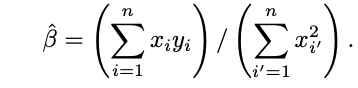

In [8]:
from PIL import Image
from IPython.display import display
img = Image.open('../images/3.38.png')
display(img)

The coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X when the denominator is the same (sum of x^2 == sum of y^2)

(b) Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X.

In [9]:
x = np.linspace(0, 100.0, 100)
y = np.linspace(0, 50.0, 100)

model1 = sm.OLS(y, x)
results1 = model1.fit()

model2 = sm.OLS(x, y)
results2 = model2.fit()

print(results1.summary())
print(results2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.638e+33
Date:                Tue, 11 Jun 2024   Prob (F-statistic):                        0.00
Time:                        10:29:42   Log-Likelihood:                          3155.7
No. Observations:                 100   AIC:                                     -6309.
Df Residuals:                      99   BIC:                                     -6307.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

(c) Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X.

In [10]:
x = np.linspace(0, 100.0, 100)
y = np.linspace(100, 0, 100)

model1 = sm.OLS(y, x)
results1 = model1.fit()

model2 = sm.OLS(x, y)
results2 = model2.fit()

print(results1.summary())
print(results2.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.243
Model:                            OLS   Adj. R-squared (uncentered):              0.235
Method:                 Least Squares   F-statistic:                              31.70
Date:                Tue, 11 Jun 2024   Prob (F-statistic):                    1.69e-07
Time:                        10:29:43   Log-Likelihood:                         -533.84
No. Observations:                 100   AIC:                                      1070.
Df Residuals:                      99   BIC:                                      1072.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

--- 

### Exercise 13

In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use the default random number generator with seed set to 1 prior to starting part (a) to ensure consistent results.m


(a) Using the normal() method of your random number generator, create a vector, x, containing 100 observations drawn from a N(0,1) distribution. This represents a feature, X.

In [11]:
rng = np.random.default_rng(1)
x = rng.normal(0, 1, 100)


(b) Using the normal() method, create a vector, eps, containing 100 observations drawn from a N(0,0.25) distribution—a normal distribution with mean zero and variance 0.25.

In [12]:
eps = rng.normal(0, 0.5, 100)

(c) Using x and eps, generate a vector y according to the model
Y =−1+0.5X+ε. (3.39)
What is the length of the vector y? What are the values of β0 and β1 in this linear model?

In [13]:
Y = -1 + 0.5*x + eps
len(Y)

100

b0 == -1 and b1 == 0.5

(d) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.

<Axes: >

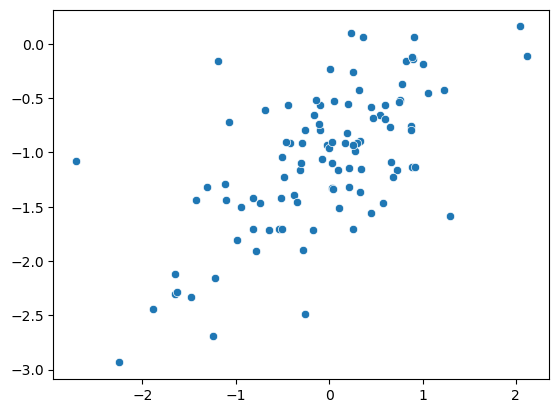

In [14]:
import seaborn as sns

sns.scatterplot(x=x, y=Y)

(e) Fit a least squares linear model to predict y using x. Comment on the model obtained. How do βˆ0 and βˆ1 compare to β0 and β1?

In [15]:
X = MS('x').fit_transform(pd.DataFrame({'x': x}))

model = sm.OLS(Y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     67.79
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           8.04e-13
Time:                        10:29:45   Log-Likelihood:                -71.745
No. Observations:                 100   AIC:                             147.5
Df Residuals:                      98   BIC:                             152.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0380      0.050    -20.647      0.0

/opt/anaconda3/envs/islp/lib/python3.11/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:


The linear model manages to find very close estimator of the original Bs.

(f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() method of the axes to create an appropriate legend.

<Axes: ylabel='None'>

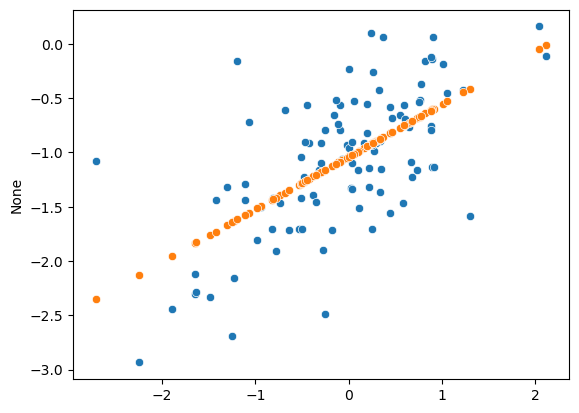

In [16]:
sns.scatterplot(x=x, y=Y)
sns.scatterplot(x=x, y=results.fittedvalues)

(g) Now fit a polynomial regression model that predicts y using x and x2. Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [17]:
X = MS([poly('x', degree=3)]).fit_transform(pd.DataFrame({'x': x}))

model = sm.OLS(Y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     22.78
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           3.19e-11
Time:                        10:29:45   Log-Likelihood:                -71.151
No. Observations:                 100   AIC:                             150.3
Df Residuals:                      96   BIC:                             160.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept               -1.0737 

/opt/anaconda3/envs/islp/lib/python3.11/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:


<Axes: ylabel='None'>

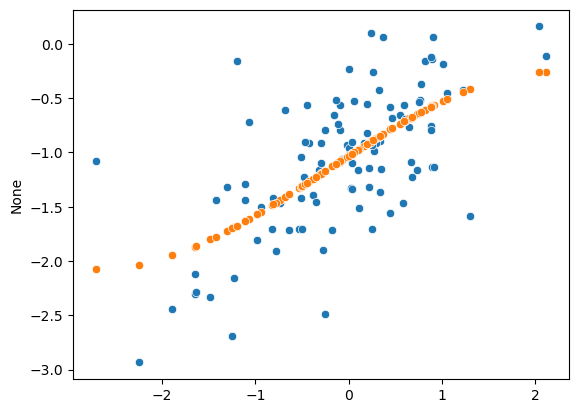

In [18]:
sns.scatterplot(x=x, y=Y)
sns.scatterplot(x=x, y=results.fittedvalues)

The model, with quadratic components just overfits the training data.

(h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term ε in (b). Describe your results.

The error drops, the explained variability increases and the quadratic term model seems less impacted.

(i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term ε in (b). Describe your results.

The error rises, the explained variability decreases and the quadratic term model seems more impacted.


(j) What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

The confidence lintervals of the beta estimators are bigger when the noise is bigger

---

### Exercise 14

This problem focuses on the collinearity problem. 

(a) Perform the following commands in Python:

    rng = np.random.default_rng(10)
    x1 = rng.uniform(0, 1, size=100)
    x2 = 0.5 * x1 + rng.normal(size=100) / 10
    y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefficients?


In [19]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

The linear model is:

    Y_hat = b0 + b1*x1 + b2*x2

(b) What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.

<Axes: >

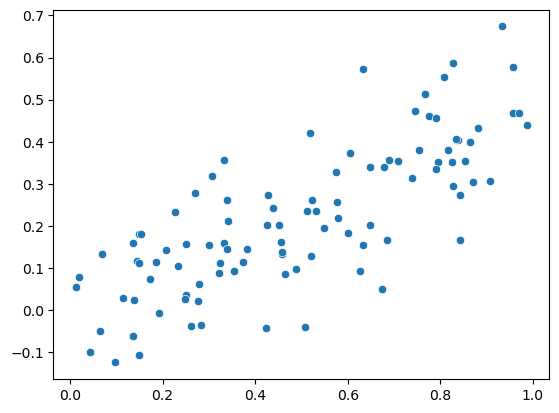

In [21]:
sns.scatterplot(x=x1, y=x2)

(c) Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are βˆ0, βˆ1, and βˆ2? How do these relate to the true β0, β1, and β2? Can you reject the null hypothesis H0 : β1 = 0? How about the null hypothesis H0 : β2 = 0?

In [23]:
X = MS(['x1', 'x2']).fit_transform(pd.DataFrame({'x1': x1, 'x2': x2}))
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           5.76e-08
Time:                        10:40:52   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9579      0.190     10.319      0.0

/opt/anaconda3/envs/islp/lib/python3.11/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
/opt/anaconda3/envs/islp/lib/python3.11/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:


(d) Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis H0 :β1 =0?

In [24]:
X = MS(['x1']).fit_transform(pd.DataFrame({'x1': x1, 'x2': x2}))
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           1.37e-08
Time:                        10:47:28   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9371      0.189     10.242      0.0

/opt/anaconda3/envs/islp/lib/python3.11/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
/opt/anaconda3/envs/islp/lib/python3.11/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:


(e) Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis H0 :β1 =0?

In [25]:
X = MS(['x2']).fit_transform(pd.DataFrame({'x1': x1, 'x2': x2}))
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           7.43e-07
Time:                        10:47:38   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3239      0.154     15.124      0.0

/opt/anaconda3/envs/islp/lib/python3.11/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
/opt/anaconda3/envs/islp/lib/python3.11/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:


(f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.

The results are not contradictory. Since x1 qnd x2 are highly correlated, adding a second varible to the model dont help much. Thats why each variable alone seems very important, but one of them seems useless in the presence of the other one. 

(g) Suppose we obtain one additional observation, which was unfortunately mismeasured. We use the function np.concatenate() to add this additional observation to each of x1, x2 and y.

    x1 = np.concatenate([x1, [0.1]]) 
    x2 = np.concatenate([x2, [0.8]]) 
    y = np.concatenate([y, [6]])
 
Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

In [26]:
x1 = np.concatenate([x1, [0.1]]) 
x2 = np.concatenate([x2, [0.8]]) 
y = np.concatenate([y, [6]])

In [27]:
X = MS(['x1','x2']).fit_transform(pd.DataFrame({'x1': x1, 'x2': x2}))
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           4.60e-08
Time:                        10:50:38   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0618      0.192     10.720      0.0

/opt/anaconda3/envs/islp/lib/python3.11/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
/opt/anaconda3/envs/islp/lib/python3.11/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:


<Axes: >

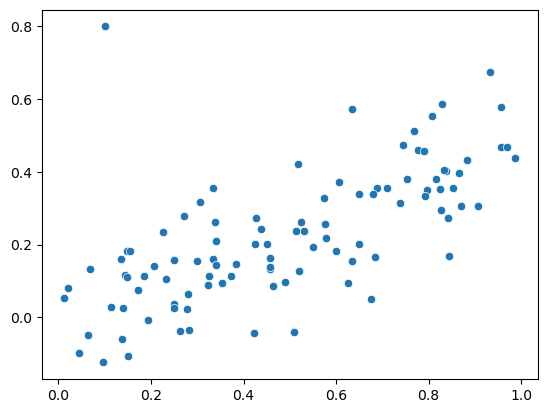

In [28]:
sns.scatterplot(x=x1, y=x2)